In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
data = pd.read_csv("daily-total-female-births-CA.csv",index_col=[0],parse_dates=[0])
data.head(10)

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
1959-01-06,29
1959-01-07,45
1959-01-08,43
1959-01-09,38


In [14]:
type(data)

pandas.core.frame.DataFrame

In [15]:
series_value = data.values

In [16]:
type(series_value)

numpy.ndarray

In [17]:
data.size

365

In [18]:
data.tail()

,births
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [19]:
data.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [20]:
data = data[0:365]
data.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


<AxesSubplot:xlabel='date'>

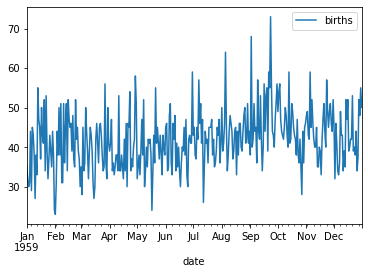

In [21]:
data.plot()

In [22]:
data_mean = data.rolling(window =20).mean()

<AxesSubplot:xlabel='date'>

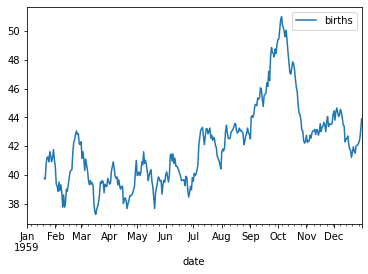

In [23]:
data_mean.plot()

In [27]:
value = pd.DataFrame(series_value)

In [28]:
data_df = pd.concat([value,value.shift(1)],axis=1)

In [29]:
data_df.head()

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [40]:
data_df.columns = ['Actual_birth','Forecast_birth']

In [41]:
data_df.head()

,Actual_birth,Forecast_birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [42]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [43]:
data_test = data_df[1:]

In [44]:
data_test.head()

,Actual_birth,Forecast_birth
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0


In [48]:
data_test = data_test[0:364]

In [49]:
data_test.tail()

,Actual_birth,Forecast_birth
360,37,34.0
361,52,37.0
362,48,52.0
363,55,48.0
364,50,55.0


In [45]:
data_error = mean_squared_error(data_test.Actual_birth,data_test.Forecast_birth)

In [46]:
data_error

84.22252747252747

In [47]:
np.sqrt(data_error)

9.177283229394606

In [ ]:
 #ARIMA -Autoregressive(p) Integrated(d) Moving Average (q)  

In [51]:
#for installation pip3 install statsmodels
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

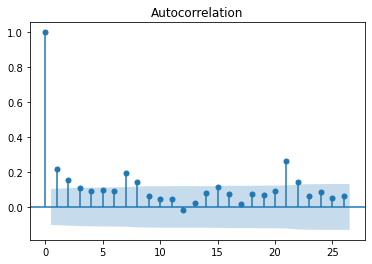

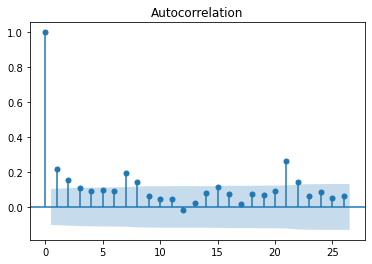

In [52]:
#plot_acf is to iddentify parameter
#ARIMA (p,d,q)


plot_acf(data)

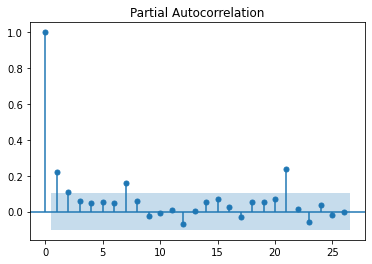

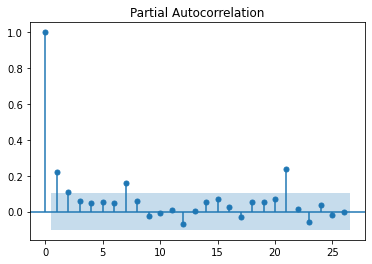

In [53]:
plot_pacf(data) # identify the value of p

In [55]:
# p=2,3 d=0,  &q=3,4


data.size

365

In [56]:
data_train = data[0:330]
data_test = data[330:365]

In [57]:
data_train.size

330

In [58]:
data_test.size

35

In [59]:
from statsmodels.tsa.arima_model import ARIMA

In [60]:
data_model = ARIMA(data_train, order=(2,1,3))

c:\users\karthika\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\karthika\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No

In [61]:
data_model_fit = data_model.fit()

c:\users\karthika\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [63]:
data_model_fit.aic

2230.948260170421

In [64]:
data_forecast = data_model_fit.forecast(steps=35)[0]

In [65]:
data_forecast

array([45.30339527, 46.31047954, 43.64905051, 44.59183892, 46.49689097,
       44.34315555, 44.08947306, 46.3436969 , 45.07508705, 43.88070845,
       45.95190484, 45.69553672, 43.97366738, 45.45647942, 46.10354853,
       44.31107151, 44.99207462, 46.2599587 , 44.79321455, 44.66449726,
       46.18549475, 45.3061449 , 44.53301258, 45.94647355, 45.74821333,
       44.60545618, 45.63318489, 46.04961996, 44.84507298, 45.33675911,
       46.18196778, 45.18569239, 45.12968058, 46.15744674, 45.55063975])

In [66]:
data_test

,births
date,
1959-11-27,51
1959-11-28,46
1959-11-29,44
1959-11-30,52
1959-12-01,45
1959-12-02,32
1959-12-03,46
1959-12-04,41
1959-12-05,34


In [67]:
np.sqrt(mean_squared_error(data_test,data_forecast))

6.8598939128157435